# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. For example, you could calculate the ratio of total charges to tenure. Create at least one plot for your new feature.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import phik
import seaborn as sns
import numpy as np

## Business Understanding

In [2]:
df = pd.read_csv('data\churn_data.csv', index_col='customerID')
df

tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
7590-VHVEG       1           No  Month-to-month           Electronic check   
5575-GNVDE      34          Yes        One year               Mailed check   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
7795-CFOCW      45           No        One year  Bank transfer (automatic)   
9237-HQITU       2          Yes  Month-to-month           Electronic check   
...            ...          ...             ...                        ...   
6840-RESVB      24          Yes        One year               Mailed check   
2234-XADUH      72          Yes        One year    Credit card (automatic)   
4801-JZAZL      11           No  Month-to-month           Electronic check   
8361-LTMKD       4          Yes  Month-to-month               Mailed check   
3186-AJIEK      66          Yes        Two year  Bank transfer (automatic)   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes  
...                    ...           ...   ...  
6840-RESVB           84.80       1990.50    No  
2234-XADUH          103.20       7362.90    No  
4801-JZAZL           29.60        346.45    No  
8361-LTMKD           74.40        306.60   Yes  
3186-AJIEK          105.65       6844.50    No  

[7043 rows x 7 columns]

## Data Understanding (Week 2, Phase 1)

### EDA

In [3]:
# use the argument minimal=True to speed this up, although you won't get all the plots and stats
report = ProfileReport(df)
report.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation (Week 2, Phase 1)

### Outliers?

<AxesSubplot:>

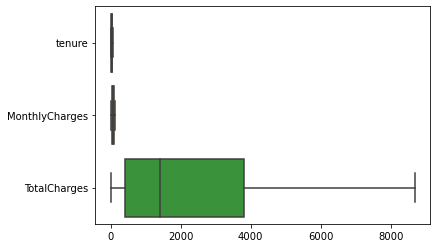

In [4]:
sns.boxplot(data=df, orient="h",whis=1.5)

Skewed results but the boxplot is not indicating any outliers.

### Missing Values?

In [5]:
df.isna().sum()

tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [6]:
df.dropna(inplace=True)

Dropped the missing values

## Data Understanding (Week 2, Phase 2)

All further data has missing values removed

In [7]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

<AxesSubplot:xlabel='TotalCharges', ylabel='Frequency'>

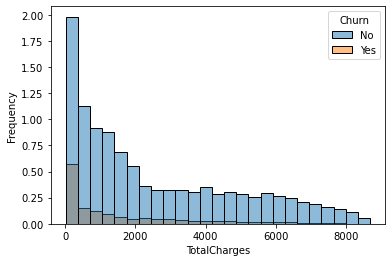

In [8]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Frequency'>

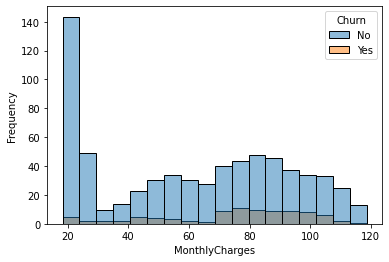

In [9]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='tenure', ylabel='Frequency'>

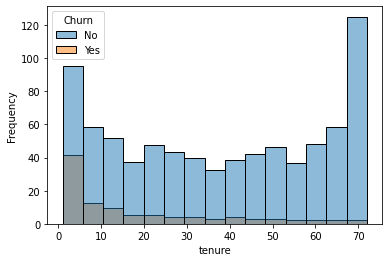

In [10]:
sns.histplot(data=df, x='tenure', hue='Churn', stat='frequency')

## Data Preparation (Week 2, Phase 2)

### Converting categoral columns to numerical values

In [11]:
df['Contract'] = df['Contract'].replace({'Month-to-month':0, 'One year': 1, 'Two year': 2})
df['PhoneService'] = df['PhoneService'].replace({'Yes':1, 'No':0})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})

### Assumption 1: tenure and monthly charges are functions of the total charges of a customer.

#### Converting Functions (DV) and IV to Logarithmic Values

In [12]:
df_log = df.copy()
df_log['TotalCharges'] = np.log(df_log['TotalCharges'])
df_log['MonthlyCharges'] = np.log(df_log['MonthlyCharges'])
df_log['tenure'] = np.log(df_log['tenure'])

#### Creating new values from ratios

Let's create a ratio of TotalCharges to MonthlyCharges and TotalCharges to Tenure.

In [13]:
df['TotalCharges_MonthlyCharges_ratio'] = df['TotalCharges'] / df['MonthlyCharges']
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['MonthlyCharges_tenure_Ratio'] = df['MonthlyCharges'] / df['tenure']

## Data Understanding (Week 2, Phase 3)

### Assumption 1 Confirmed by Correlations to Logaritmic Values

#### Redistribution

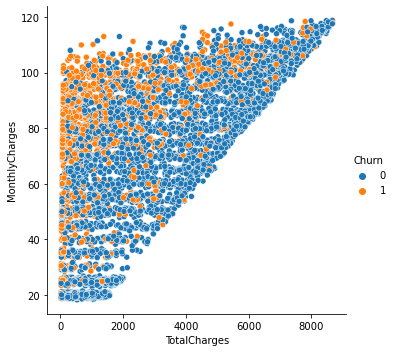

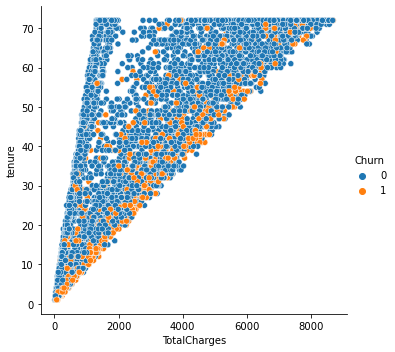

In [14]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.relplot(data=df, x='TotalCharges', y='tenure', hue='Churn')

<AxesSubplot:ylabel='Frequency'>

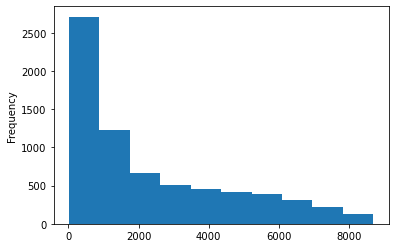

In [15]:
df['TotalCharges'].plot.hist()

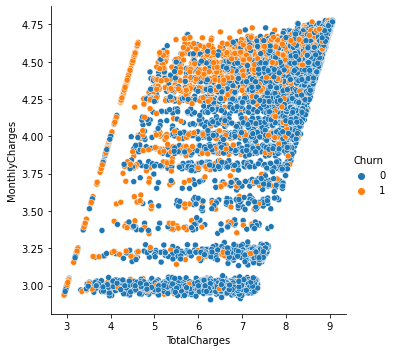

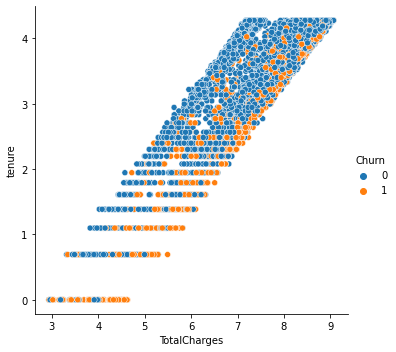

In [16]:
sns.relplot(data=df_log, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.relplot(data=df_log, x='TotalCharges', y='tenure', hue='Churn')

<AxesSubplot:ylabel='Frequency'>

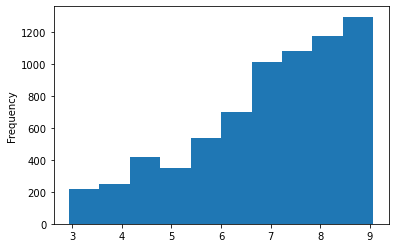

In [17]:
df_log['TotalCharges'].plot.hist()

#### Assumption 1.a: Customers with long-term contracts with higher total charges tend to leave

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

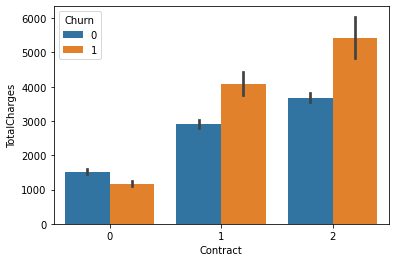

In [18]:
sns.barplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

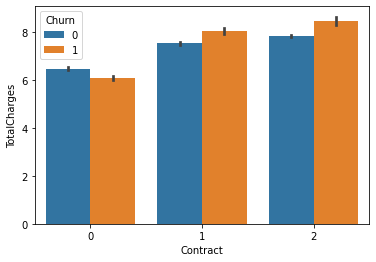

In [19]:
sns.barplot(data=df_log, x='Contract', y='TotalCharges', hue='Churn')

We also found last week that customers with long-term contracts who paid greater than 60 dollars a month tended to stay in contrast to customers in month-to-month contracts who are more likely to churn.

#### Assumption 1.b: Customers with greater monthly charges only keep their accounts because they are in a contract

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

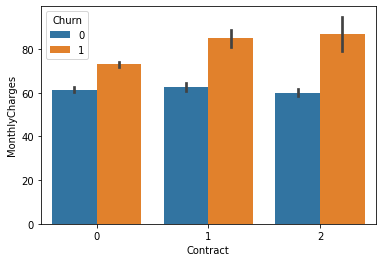

In [20]:
sns.barplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

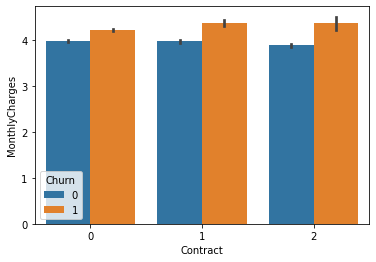

In [21]:
sns.barplot(data=df_log, x='Contract', y='MonthlyCharges', hue='Churn')

### Assumption 1 Confirmed with Ratios

#### Redistribution

In [22]:
report = ProfileReport(df)
report.to_file('churn_ratio_eda.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As expected TotalCharges divided by tenure would give me the over all average monthly charges and there is a strong positive correlation between the created variable and monthly charges. Also Total charges divided by the monthly charges would give me the amount of time they are with the company, also confirmed by the correlation between TotalCharges_MonthlyCharges_ratio and the tenure.

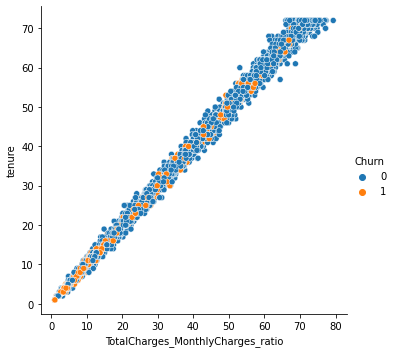

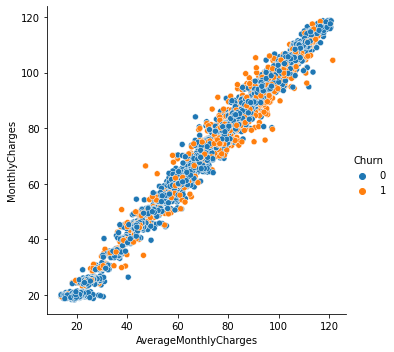

In [23]:
sns.relplot(data=df, x='TotalCharges_MonthlyCharges_ratio', y='tenure', hue='Churn')
sns.relplot(data=df, x='AverageMonthlyCharges', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='TotalCharges_MonthlyCharges_ratio', ylabel='Frequency'>

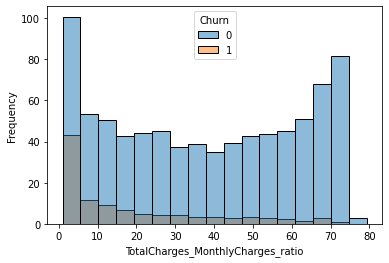

In [24]:
sns.histplot(data=df, x='TotalCharges_MonthlyCharges_ratio', hue='Churn', stat='frequency')

<AxesSubplot:xlabel='AverageMonthlyCharges', ylabel='Frequency'>

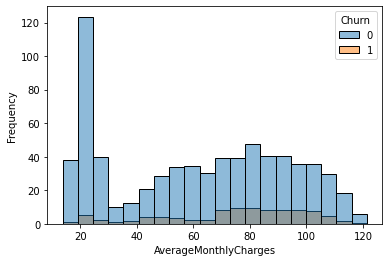

In [25]:
sns.histplot(data=df, x='AverageMonthlyCharges', hue='Churn', stat='frequency')

#### Assumption 1.a: Customers with long-term contracts with higher total charges tend to leave

<AxesSubplot:xlabel='Contract', ylabel='AverageMonthlyCharges'>

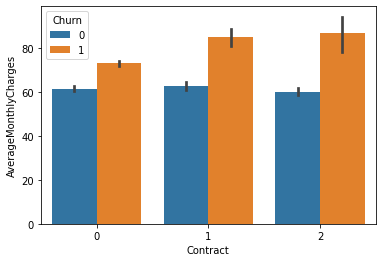

In [26]:
sns.barplot(data=df, x='Contract', y='AverageMonthlyCharges', hue='Churn')

This relationship is the comparing the ratio of TotalCharges to Tenure. If the Total Charges reach a ratio of $60:1 month tenure the customer will churn no matter the contract type. Those in long-term contracts are still bound to their contract of one to two years so their ratios tend to reach greater maximums before churning.

#### Assumption 1.b: Customers with greater monthly charges only keep their accounts because they are in a contract

The ratios Contract:tenure is almost equal to the ratio Contract:TotalCharges_MonthlyCharges_ratio showing me that the coeffcients are almost 1 to 1 and also indicate both correlations are slightly positive. Someone with a long-term contract will definitely accrue larger total charges and a longer tenure compared to someone in a month-to-month contract that can churn after every month. There is almost no correlation between contracts and monthly charges. This may be due to the lack of unique values available to the contracts (can only be 0, 1, or 2). The value counts of customers in each contract would give me a more accurate relationship of the two variables.

In [27]:
df.corr(method='pearson')

tenure  PhoneService  Contract  \
tenure                             1.000000      0.007877  0.676734   
PhoneService                       0.007877      1.000000  0.003019   
Contract                           0.676734      0.003019  1.000000   
PaymentMethod                      0.340939     -0.003106  0.359487   
MonthlyCharges                     0.246862      0.248033 -0.072739   
TotalCharges                       0.825880      0.113008  0.450306   
Churn                             -0.354049      0.011691 -0.396150   
TotalCharges_MonthlyCharges_ratio  0.998931      0.007958  0.676620   
AverageMonthlyCharges              0.246198      0.247900 -0.071691   
MonthlyCharges_tenure_Ratio       -0.534951      0.067585 -0.361188   

                                   PaymentMethod  MonthlyCharges  \
tenure                                  0.340939        0.246862   
PhoneService                           -0.003106        0.248033   
Contract                                0.359487       -0.072739   
PaymentMethod                           1.000000       -0.074640   
MonthlyCharges                         -0.074640        1.000000   
TotalCharges                            0.222694        0.651065   
Churn                                  -0.262918        0.192858   
TotalCharges_MonthlyCharges_ratio       0.340756        0.246502   
AverageMonthlyCharges                  -0.074608        0.996237   
MonthlyCharges_tenure_Ratio            -0.264714        0.050190   

                                   TotalCharges     Churn  \
tenure                                 0.825880 -0.354049   
PhoneService                           0.113008  0.011691   
Contract                               0.450306 -0.396150   
PaymentMethod                          0.222694 -0.262918   
MonthlyCharges                         0.651065  0.192858   
TotalCharges                           1.000000 -0.199484   
Churn                                 -0.199484  1.000000   
TotalCharges_MonthlyCharges_ratio      0.826161 -0.353775   
AverageMonthlyCharges                  0.650915  0.192033   
MonthlyCharges_tenure_Ratio           -0.393370  0.386065   

                                   TotalCharges_MonthlyCharges_ratio  \
tenure                                                      0.998931   
PhoneService                                                0.007958   
Contract                                                    0.676620   
PaymentMethod                                               0.340756   
MonthlyCharges                                              0.246502   
TotalCharges                                                0.826161   
Churn                                                      -0.353775   
TotalCharges_MonthlyCharges_ratio                           1.000000   
AverageMonthlyCharges                                       0.248191   
MonthlyCharges_tenure_Ratio                                -0.534202   

                                   AverageMonthlyCharges  \
tenure                                          0.246198   
PhoneService                                    0.247900   
Contract                                       -0.071691   
PaymentMethod                                  -0.074608   
MonthlyCharges                                  0.996237   
TotalCharges                                    0.650915   
Churn                                           0.192033   
TotalCharges_MonthlyCharges_ratio               0.248191   
AverageMonthlyCharges                           1.000000   
MonthlyCharges_tenure_Ratio                     0.050011   

                                   MonthlyCharges_tenure_Ratio  
tenure                                               -0.534951  
PhoneService                                          0.067585  
Contract                                             -0.361188  
PaymentMethod                                        -0.264714  
MonthlyCharges                                        0

## Save Dataframe

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tenure                             7032 non-null   int64  
 1   PhoneService                       7032 non-null   int64  
 2   Contract                           7032 non-null   int64  
 3   PaymentMethod                      7032 non-null   int64  
 4   MonthlyCharges                     7032 non-null   float64
 5   TotalCharges                       7032 non-null   float64
 6   Churn                              7032 non-null   int64  
 7   TotalCharges_MonthlyCharges_ratio  7032 non-null   float64
 8   AverageMonthlyCharges              7032 non-null   float64
 9   MonthlyCharges_tenure_Ratio        7032 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 862.4+ KB


In [33]:
df.to_csv('prepped_churn_data.csv')
df_log.to_csv('prepped_logchurn_data.csv')

## Summary

Write your summary of the process and results here.

**Process Summary**

I began with a reviewing the dataframe to gain insight into the business and how to tackle the question being asked. For a deeper understanding of the data and the relationships I produced an EDA. I checked for any outliers using boxplots and no data points fell outside the whiskers so there were no outliers to deal with. Next, I scanned the data for any missing values and found 11 missing Total Charges. I contemplated many ways of filling the data including interpolation _which I found most interesting_ . Without having further knowledge of how the command interacts with the data I decided to just remove all rows with missing values. I again reviewed the data with the missing values removed, not much had changed which is good. Next, I converted the categorical columns _(Churn, Contracts, PaymentMethods, PhoneService)_ into numerical values. I created an assumption that _tenure_ and _monthlycharges_ are functions of _totalcharges_ and converted all variables into logarithmic data to model in linear regression analyses. I created new ratio variables based on this assumption as well. I displayed the redistribution of the models under each conversion and confirmed whether or not the data was consistent with my assumptions. I saved the prepped dataframe all the ratios and logarithms for later use.

**Summary of Results**

I did find that there was a positive linear relationship between the totalcharges and tenure as well as the totalcharges and monthlycharges. I found a strong relationship between the Total and Monthly charges and a person's decision to churn. When the total charges of a customer's account reaches the $60 a month average over their tenure they will churn when their contract ends.

# NOTE TO SELF!

**Holy Mama!** I need to look into the [phik documentation](https://phik.readthedocs.io/en/latest/) more.

In [30]:
df.significance_matrix()

interval columns not set, guessing: ['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_MonthlyCharges_ratio', 'AverageMonthlyCharges', 'MonthlyCharges_tenure_Ratio']


tenure  PhoneService    Contract  \
tenure                             173.357888     -0.437771   62.189453   
PhoneService                        -0.437771     66.565035   -1.372744   
Contract                            62.189453     -1.372744  118.270803   
PaymentMethod                       33.040882     -0.982151   32.295020   
MonthlyCharges                      30.859340     46.492408   28.825630   
TotalCharges                       100.653605     15.164051   41.513698   
Churn                               30.431695      0.409839   37.026979   
TotalCharges_MonthlyCharges_ratio  154.958987     -0.535579   62.480875   
AverageMonthlyCharges               28.163610     42.710167   25.238933   
MonthlyCharges_tenure_Ratio         65.078367      8.074693   38.821669   

                                   PaymentMethod  MonthlyCharges  \
tenure                                 33.040882       30.859340   
PhoneService                           -0.982151       46.492408   
Contract                               32.295020       28.825630   
PaymentMethod                         138.362797       35.964327   
MonthlyCharges                         35.964327      172.283370   
TotalCharges                           30.967489       71.012915   
Churn                                  24.693907       23.563371   
TotalCharges_MonthlyCharges_ratio      32.804580       31.322442   
AverageMonthlyCharges                  35.680114      149.502961   
MonthlyCharges_tenure_Ratio            23.792500       36.930267   

                                   TotalCharges      Churn  \
tenure                               100.653605  30.431695   
PhoneService                          15.164051   0.409839   
Contract                              41.513698  37.026979   
PaymentMethod                         30.967489  24.693907   
MonthlyCharges                        71.012915  23.563371   
TotalCharges                         162.098791  17.607034   
Churn                                 17.607034  90.023365   
TotalCharges_MonthlyCharges_ratio    101.318925  30.432379   
AverageMonthlyCharges                 71.490239  21.425997   
MonthlyCharges_tenure_Ratio           49.799960  30.400363   

                                   TotalCharges_MonthlyCharges_ratio  \
tenure                                                    154.958987   
PhoneService                                               -0.535579   
Contract                                                   62.480875   
PaymentMethod                                              32.804580   
MonthlyCharges                                             31.322442   
TotalCharges                                              101.318925   
Churn                                                      30.432379   
TotalCharges_MonthlyCharges_ratio                         173.600067   
AverageMonthlyCharges                                      29.288809   
MonthlyCharges_tenure_Ratio                                64.349376   

                                   AverageMonthlyCharges  \
tenure                                         28.163610   
PhoneService                                   42.710167   
Contract                                       25.238933   
PaymentMethod                                  35.680114   
MonthlyCharges                                149.502961   
TotalCharges                                   71.490239   
Churn                                          21.425997   
TotalCharges_MonthlyCharges_ratio              29.288809   
AverageMonthlyCharges                         174.207398   
MonthlyCharges_tenure_Ratio                    35.913142   

                                   MonthlyCharges_tenure_Ratio  
tenure                                               65.078367  
PhoneService                                          8.074693  
Contract                                             38.821669  
PaymentMethod                                        23.792500  
Mo

In [31]:
cols = ['PhoneService','MonthlyCharges']
df[cols].hist2d()

interval columns not set, guessing: ['PhoneService', 'MonthlyCharges']


MonthlyCharges      1      2      3      4      5      6      7      8   \
PhoneService                                                              
1                 80.0  191.0  187.0  150.0   72.0    0.0    0.0    0.0   
10              1520.0    0.0  177.0  488.0  400.0  894.0  952.0  869.0   

MonthlyCharges     9      10  
PhoneService                  
1                 0.0    0.0  
10              758.0  294.0

In [32]:
df[cols].outlier_significance_matrix()

interval columns not set, guessing: ['PhoneService', 'MonthlyCharges']


18.2_28.3  28.3_38.3  38.3_48.4  48.4_58.4  58.4_68.5  68.5_78.5  \
-0.0_0.1  -7.647904  31.464000  21.524326  10.965786   3.980179 -13.746528   
0.9_1.0    7.954904 -28.229032  -8.209536  -8.209536  -4.005094  13.918620   

          78.5_88.6  88.6_98.6  98.6_108.7  108.7_118.8  
-0.0_0.1 -14.228301 -13.535025  -12.564180    -7.539175  
0.9_1.0   14.470433  13.677620   12.580499     7.072401